In [2]:
import pandas as pd
import seaborn as sns

adult_dataset = pd.read_csv('./data/adult.csv', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_dataset_numeric = adult_dataset[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [9]:
adult_dataset_numeric.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [10]:
adult_dataset_numeric.isna().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

<AxesSubplot:>

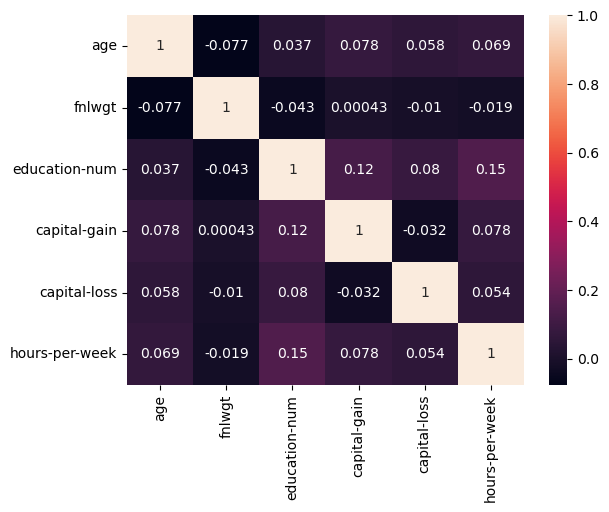

In [6]:
sns.heatmap(adult_dataset_numeric.corr(), annot=True)

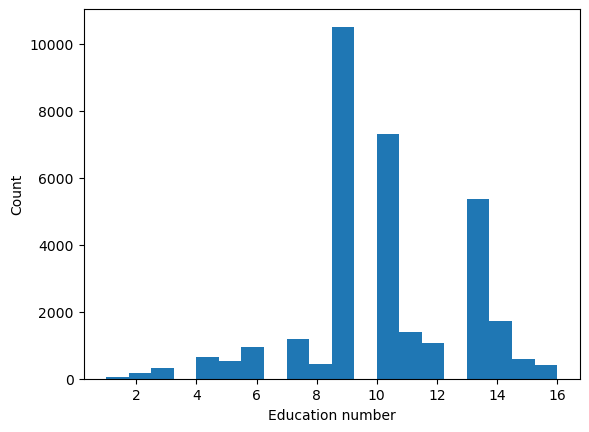

In [12]:
sns.distplot(
    adult_dataset_numeric['education-num'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Education number', ylabel='Count');

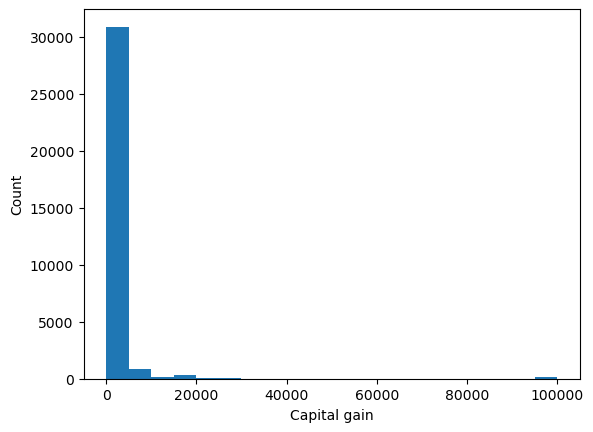

In [15]:
sns.distplot(
    adult_dataset_numeric['capital-gain'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Capital gain', ylabel='Count');

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


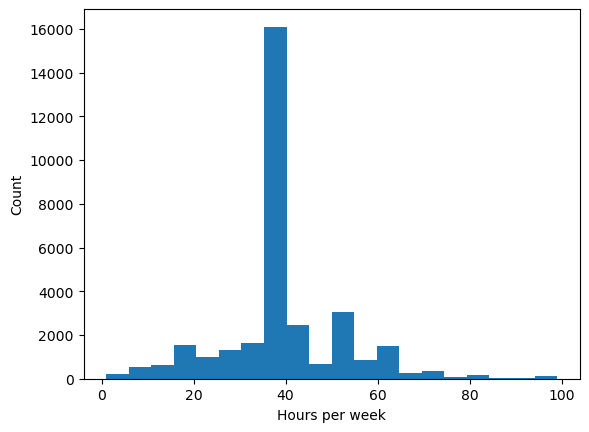

In [18]:
sns.distplot(
    adult_dataset_numeric['hours-per-week'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Hours per week', ylabel='Count');

- There are no nan / null values in the dataset
- There is a slight collelation (0.12) between education-num and capital-gain. This is expected as people with higher education tend to have higher income and hence higher capital-gain.
- There is a slight correlation (0.15) between education-num and hours-per-week. This is expected as people with higher education tend to work more hours per week.
- Capital gain is mostly centered around the average / median income as expected.
- hours per week is also as expected peaking around 40 hours per week

Based on above observations, we are be-able to start with a scatteplot to display the education-num and capital-gain. As these have the highest correlations.

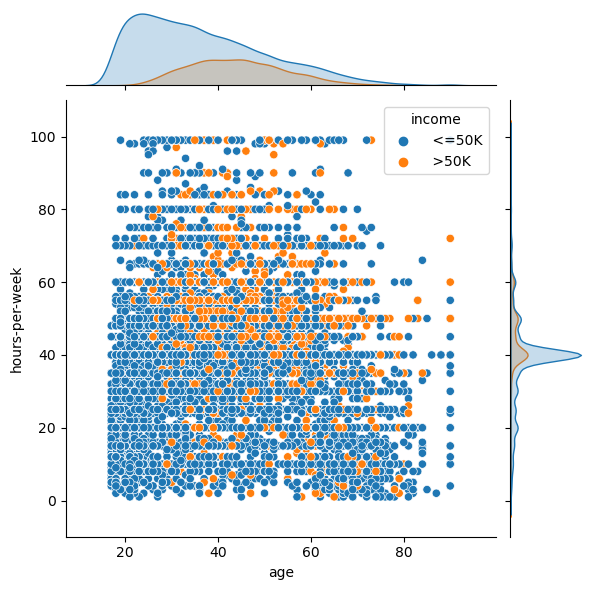

In [29]:
from sklearn.discriminant_analysis import StandardScaler


#adult_dataset_numeric_scaled = pd.DataFrame(StandardScaler().fit_transform(adult_dataset_numeric), columns=adult_dataset_numeric.columns)
sns.jointplot(x=adult_dataset['age'], y=adult_dataset['hours-per-week'], hue=adult_dataset['income']);


## Seeds dataset

In [36]:
seeds_dataset = pd.read_csv('./data/Seed_Data.csv', header=None, skiprows=1, names=['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class'])
seeds_dataset.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [47]:
seeds_dataset.shape

(210, 8)

In [39]:
seeds_dataset_numeric = seeds_dataset[['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove']]
seeds_dataset_numeric.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
dtype: int64

In [40]:
seeds_dataset_numeric.isna().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
dtype: int64

<AxesSubplot:>

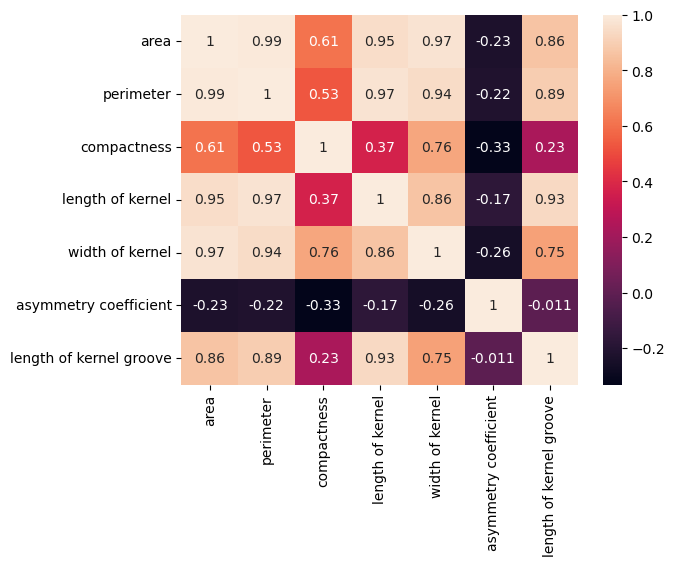

In [42]:
sns.heatmap(seeds_dataset_numeric.corr(), annot=True)

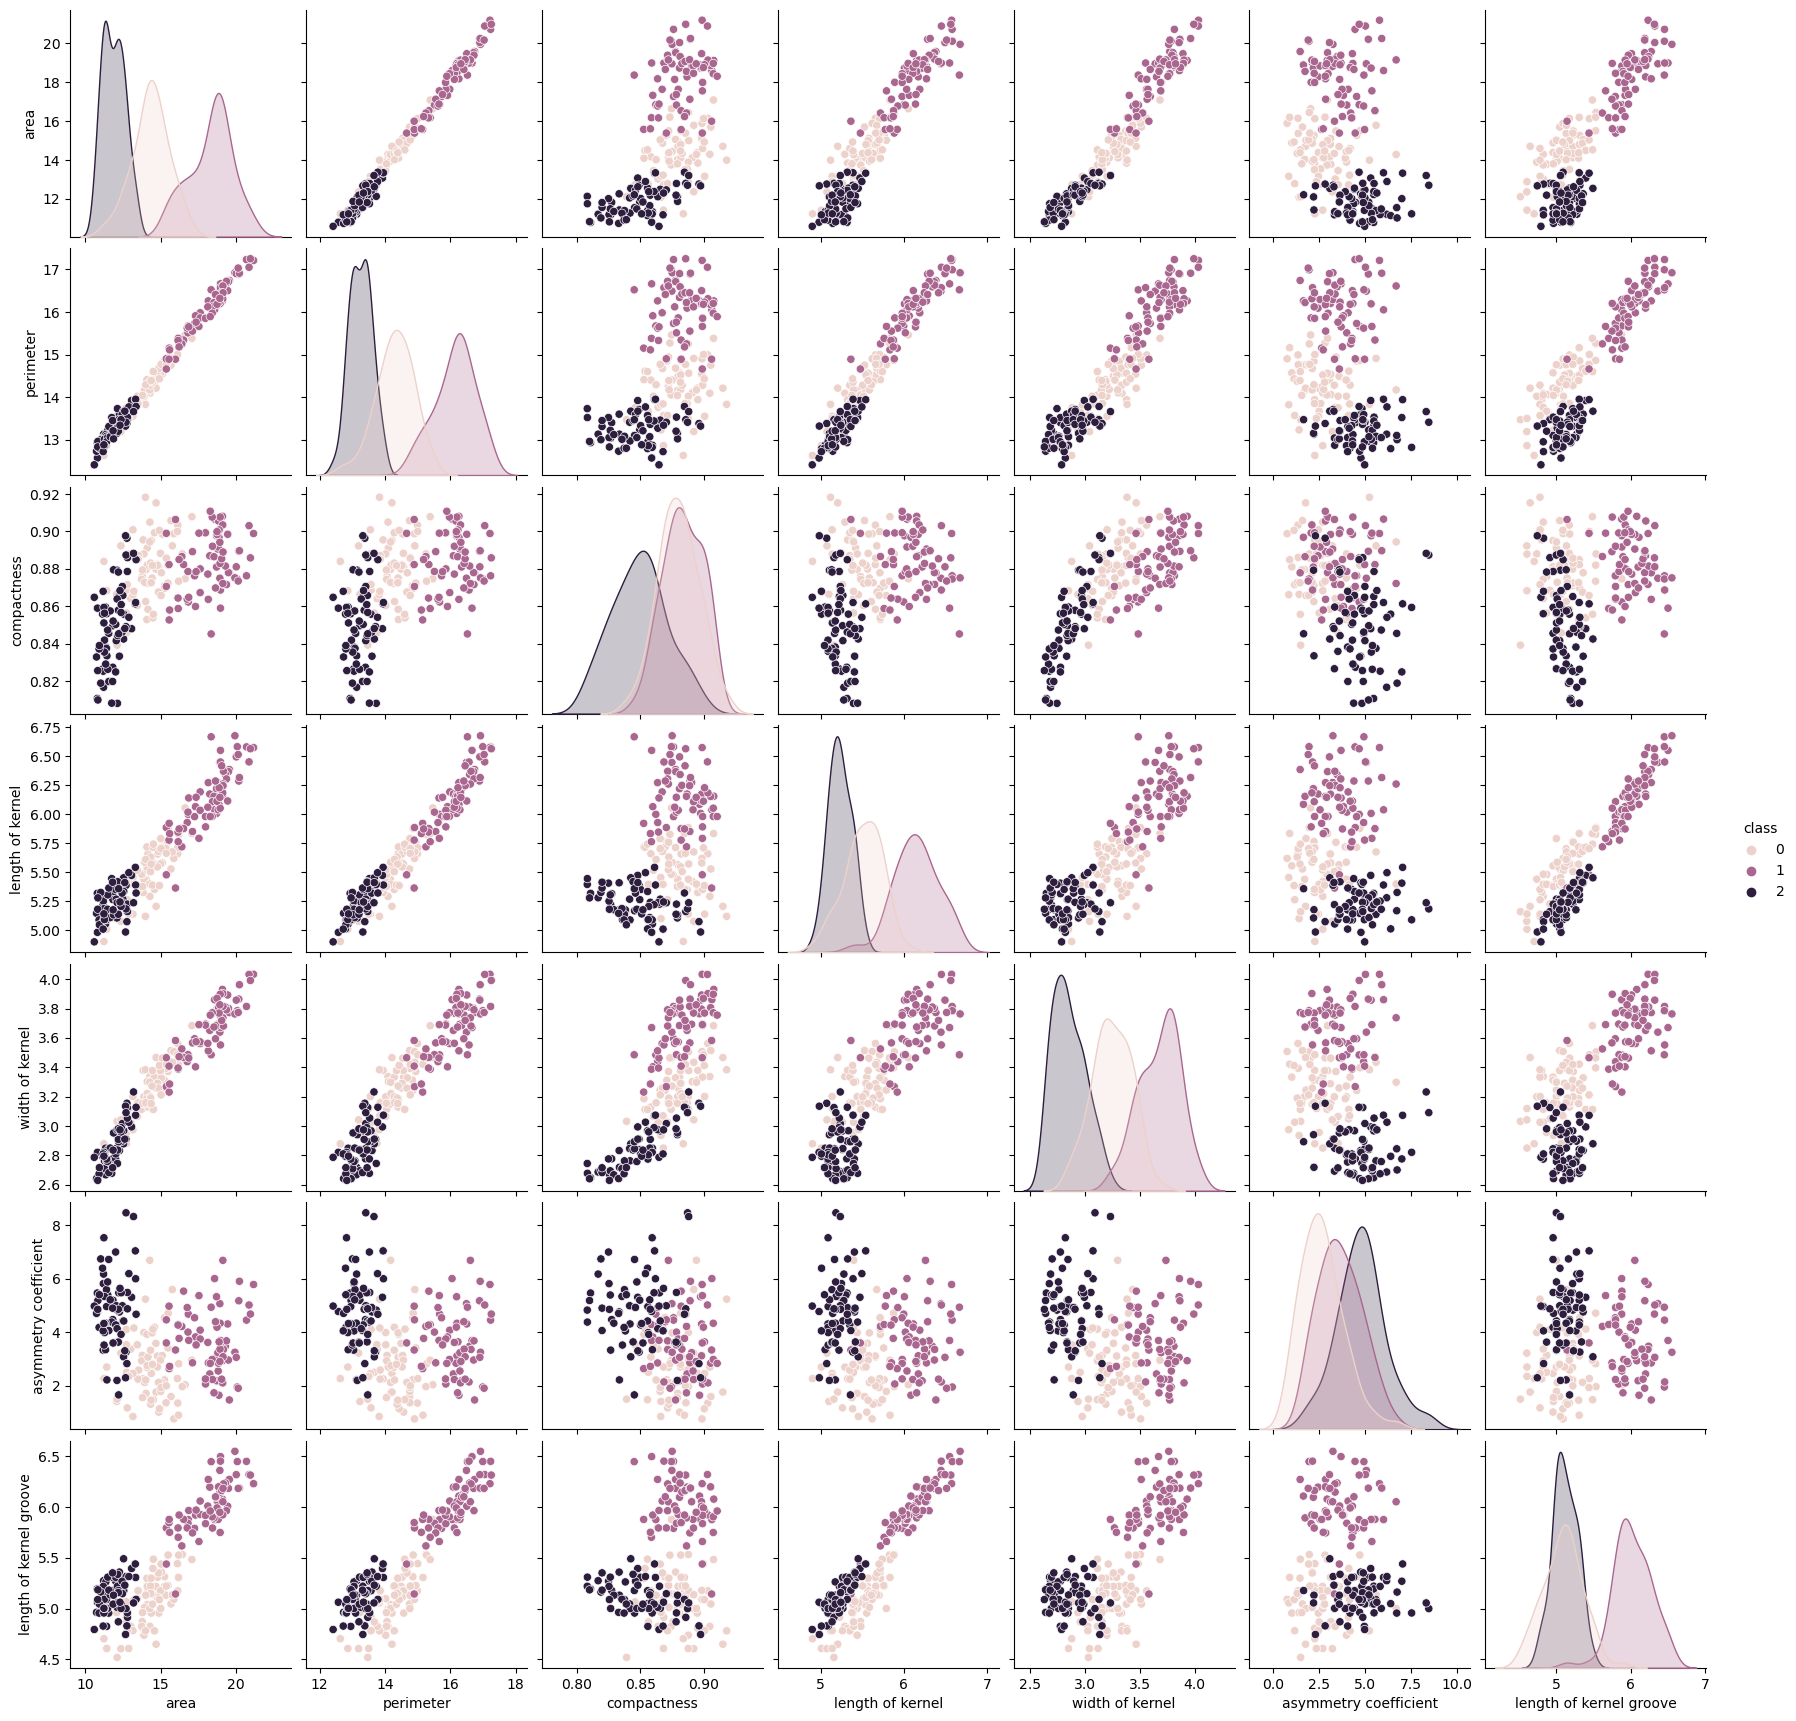

In [45]:
sns.pairplot(seeds_dataset, hue='class')

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


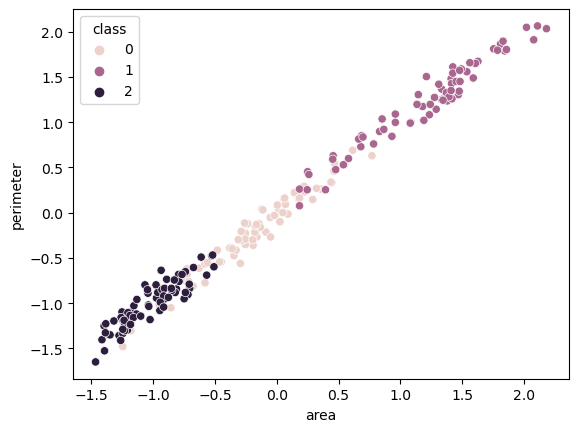

In [74]:
seeds_dataset_numeric_scaled = pd.DataFrame(StandardScaler().fit_transform(seeds_dataset_numeric), columns=seeds_dataset_numeric.columns)
sns.scatterplot(x=seeds_dataset_numeric_scaled['area'], y=seeds_dataset_numeric_scaled['perimeter'], hue=seeds_dataset['class']);

/tmp/ipykernel_579/3805907415.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)


Text(0.5, 0, 'Weight')

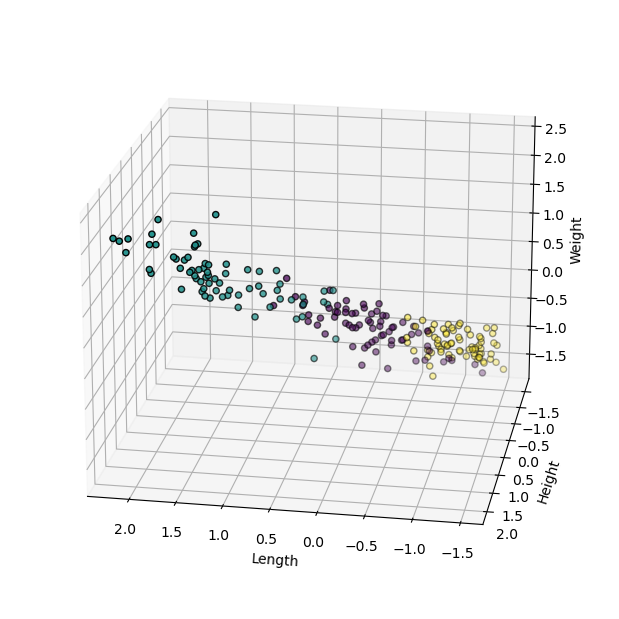

In [73]:

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(seeds_dataset_numeric_scaled['area'], seeds_dataset_numeric_scaled['perimeter'], seeds_dataset_numeric_scaled['length of kernel'],c=seeds_dataset['class'], edgecolor='k')

ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')


In [84]:
data_for_rq1 = seeds_dataset[['area', 'perimeter', 'class']]
data_for_rq1.head()

,area,perimeter,class
0,15.26,14.84,0
1,14.88,14.57,0
2,14.29,14.09,0
3,13.84,13.94,0
4,16.14,14.99,0


In [85]:
data_for_rq1.to_csv('./data/seeds-dataset/rq1.csv')

In [86]:
data_for_rq2 = seeds_dataset[['area', 'perimeter', 'length of kernel', 'class']]
data_for_rq2.head()

,area,perimeter,length of kernel,class
0,15.26,14.84,5.763,0
1,14.88,14.57,5.554,0
2,14.29,14.09,5.291,0
3,13.84,13.94,5.324,0
4,16.14,14.99,5.658,0


In [87]:
data_for_rq2.to_csv('./data/seeds-dataset/rq2.csv')